## Robot@Home 2 - Iterating over RGBD images `v0.1`

`R@H2 notebook series`   

<a href="https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/50-RGBD-observations.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>



### R@H2 functions introduced in this notebook:



-   `filter_sensor_observations`
- `composed_RGBD_images`




### Geting started



Install Robot@Home2 Toolbox using the Python package manager



In [ ]:
!pip install robotathome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.5 MB/s eta 0:00:00


Now, let's mount Google Drive (more info in [this notebook](https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/05-Google-colab-drive.ipynb)) and instantiate the RobotAtHome class.

In [ ]:
from google.colab import drive
from robotathome import RobotAtHome
from robotathome import logger, log, set_log_level

# Let's mount Google Drive
drive.mount('/content/drive')

# Then copy the provided configutarion file to the current directory
!cp /content/drive/MyDrive/R@H2-2.0.3/notebooks/.rh .

# And create an instance of the RobotAtHome class
try: 
      rh = RobotAtHome()
except:
      logger.error("Something was wrong")


Mounted at /content/drive


2023-04-16 20:04:06.653 | SUCCESS  | robotathome.core.reader:__open_dataset:141 - Connection is established: rh.db


### Iterating R@H2 over RGB-D images




For our first and more generic example, we are going to iterate over RGBD images coming from just a sensor, say the RGBD_1 camera.
Specifically, we are going to iterate over labeled RGBD images from **master room** of the **alma** home.

In [ ]:
from robotathome import filter_sensor_observations

log.set_log_level('INFO')  # SUCCESS is the default

# Fill the variables that constitutes selection filter
home_session_name = 'alma-s1'
home_subsession = 0
room_name = 'alma_masterroom1'
sensor_list = ['RGBD_1']  # Later, we will use more than one camera sensor

# Get the labeled RGB-D observations dataframe
df = rh.get_sensor_observations('lblrgbd')

# Filter the dataframe and get a dictionary with a dataframe per sensor
df_dict = filter_sensor_observations(rh, df,
                                     home_session_name,
                                     home_subsession,
                                     room_name,
                                     sensor_list)

logger.info(f"Labeled RGBD set: {len(df)} observations")
logger.info(f"No. of RGBD observations int the filtered subset for the sensor RGBD_1: {len(df_dict['RGBD_1'])} observations")

2023-04-16 20:04:07.954 | INFO     | __main__:<cell line: 21>:21 - Labeled RGBD set: 32937 observations
2023-04-16 20:04:07.955 | INFO     | __main__:<cell line: 22>:22 - No. of RGBD observations int the filtered subset for the sensor RGBD_1: 299 observations


In the previous code we have introduced the function `filter_sensor_observations`. This function **applies a filter to a [dataframe of observations](https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/50-RGBD-observations.ipynb)** to select data for a home session and home subsession, a room name, and a list of sensor names. It **returns a dictionary with a item per sensor**. Keys are the sensor names, and values are the filtered dataframe for that sensor.

Let's show the keys:

In [ ]:
df_dict.keys()

dict_keys(['RGBD_1'])

and the info of the dataframe associated with the key, i.e., the dataframe of the RGB-D observations of the camera sensor RGBD_1:

In [ ]:

df_dict['RGBD_1'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 31741 to 32933
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  299 non-null    int64  
 1   timestamp           299 non-null    int64  
 2   home_session_id     299 non-null    int64  
 3   home_subsession_id  299 non-null    int64  
 4   home_id             299 non-null    int64  
 5   room_id             299 non-null    int64  
 6   sensor_id           299 non-null    int64  
 7   sensor_name         299 non-null    object 
 8   sensor_pose_x       299 non-null    float64
 9   sensor_pose_y       299 non-null    float64
 10  sensor_pose_z       299 non-null    float64
 11  sensor_pose_yaw     299 non-null    float64
 12  sensor_pose_pitch   299 non-null    float64
 13  sensor_pose_roll    299 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 35.0+ KB


A summary of the dataframe values can also be showed:

In [ ]:
df_dict['RGBD_1']

,id,timestamp,home_session_id,home_subsession_id,home_id,room_id,sensor_id,sensor_name,sensor_pose_x,sensor_pose_y,sensor_pose_z,sensor_pose_yaw,sensor_pose_pitch,sensor_pose_roll
31741,103660,130986337983213847,0,0,0,5,1,RGBD_1,0.270716,-0.034998,1.014880,-0.784923,-0.000095,-1.57010
31745,103664,130986337984149848,0,0,0,5,1,RGBD_1,0.267345,-0.035482,0.998499,-0.786443,-0.005870,-1.56410
31749,103668,130986337985085850,0,0,0,5,1,RGBD_1,0.267427,-0.036074,0.993881,-0.786285,-0.007675,-1.56307
31753,103672,130986337986021852,0,0,0,5,1,RGBD_1,0.267609,-0.035955,0.995146,-0.786528,-0.007284,-1.56323
31757,103676,130986337986957853,0,0,0,5,1,RGBD_1,0.267663,-0.035874,0.995975,-0.786507,-0.007129,-1.56353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32917,104836,130986338258398330,0,0,0,5,1,RGBD_1,1.693150,0.260468,1.015910,-2.975000,0.023293,-1.57739
32921,104840,130986338259334332,0,0,0,5,1,RGBD_1,1.693140,0.260286,1.016280,-2.975200,0.023675,-1.57754
32925,104844,130986338260270333,0,0,0,5,1,RGBD_1,1.693290,0.260341,1.016320,-2.975140,0.023936,-1.57759
32929,104848,130986338261206335,0,0,0,5,1,RGBD_1,1.693230,0.260263,1.016190,-2.975500,0.023459,-1.57779


Now, it's time to iterate. For that, we introduce a new function named `composed_RGBD_images`, which is a **generator function**, .i.e. a function that behaves like an **iterator**. Its name comes from the idea that it is able to return a dictionary of images from all the sensors in the initial `sensor_list`

The image size is:  (320, 240, 3)


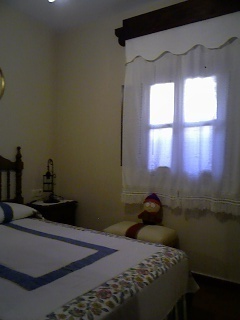

The image size is:  (320, 240, 3)


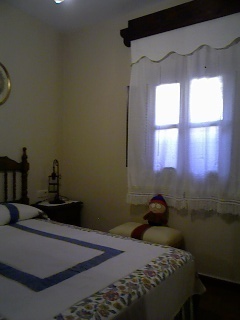

The image size is:  (320, 240, 3)


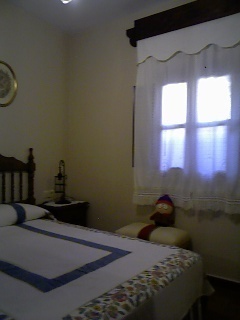

The image size is:  (320, 240, 3)


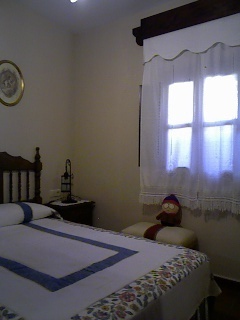

The image size is:  (320, 240, 3)


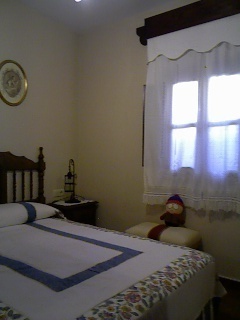

In [ ]:
from robotathome import composed_RGBD_images
# cv2 causes some trouble to Colab so they provide a patch
# Usually you'll write: from cv2 import imshow
from google.colab.patches import cv2_imshow

# For this example, we'll select just a few frames
df_RGBD_1_only_some_frames = {}
df_RGBD_1_only_some_frames['RGBD_1'] = df_dict['RGBD_1'][30:35]

# Iterate over the dictionary of dataframes, i.e. frame by frame
for (RGB_image_dict, D_image_dict) in composed_RGBD_images(rh, df_RGBD_1_only_some_frames):
    print("The image size is: ", RGB_image_dict['RGBD_1'].shape)
    cv2_imshow(RGB_image_dict['RGBD_1'])    



and the same for depth images

The image size is:  (320, 240, 3)


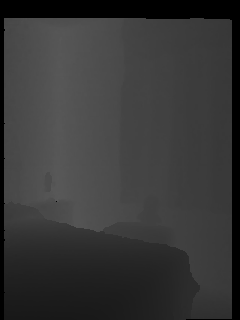

The image size is:  (320, 240, 3)


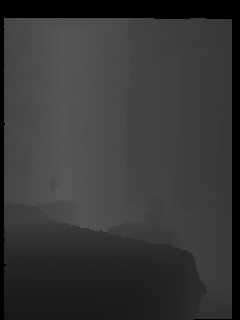

The image size is:  (320, 240, 3)


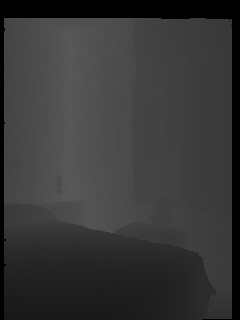

The image size is:  (320, 240, 3)


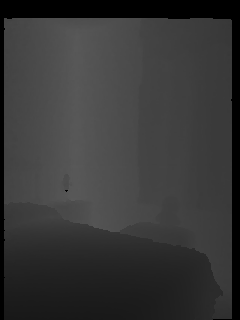

The image size is:  (320, 240, 3)


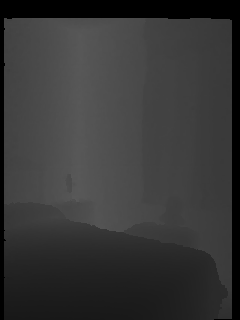

In [ ]:
# Iterate over the dictionary of dataframes, i.e. frame by frame
for (_, D_image_dict) in composed_RGBD_images(rh, df_RGBD_1_only_some_frames):
    print("The image size is: ", D_image_dict['RGBD_1'].shape)
    cv2_imshow(D_image_dict['RGBD_1']) 